# Testing different investment strategies

## Importing modules

In [1]:
import sys
sys.path.append('../src')

from data_loader import load_sector_data, get_seasonal_returns, calculate_sector_ratio

from timeseries_analysis import *
from stats_analysis import calculate_statistics, seasonal_ttest
from visualization import plot_seasonal_comparison, plot_monthly_averages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

print("✓ Setup complete!")

✓ Setup complete!


## load the data

In [2]:
# Load the data
file_path = '../data/Seasonal S&P Data as of 11.13.2025 - Abhi.xlsx'

df_sp500 = load_sector_data(file_path, 'S&P500')
df_rf = load_sector_data(file_path, 'RF')
df_cyclical = load_sector_data(file_path, 'Discretionary')
df_defense = load_sector_data(file_path, 'Staples')
df_industrials = load_sector_data(file_path, 'Industrials')
df_tech = load_sector_data(file_path, 'Tech')
df_communications = load_sector_data(file_path, 'Comm. Services')
df_financials = load_sector_data(file_path, 'Financials')
df_energy = load_sector_data(file_path, 'Energy')
df_materials = load_sector_data(file_path, 'Materials')
df_healthcare = load_sector_data(file_path, 'Healthcare')
df_utilities = load_sector_data(file_path, 'Utilities')
df_realestate = load_sector_data(file_path, 'Real Estate')
df_pacer = load_sector_data(file_path, 'SZNE')
df_inflation = load_sector_data(file_path, 'Inflation')
df_interest = load_sector_data(file_path, 'Interest Rate')

print("SP 500 data:")
print(f"  Years: {df_sp500.index.min()} - {df_sp500.index.max()}")
print(f"  Shape: {df_sp500.shape}")

print("\nRF data:")
print(f"  Years: {df_rf.index.min()} - {df_rf.index.max()}")
print(f"  Shape: {df_rf.shape}")

print("\nFirst few rows of S&P500:")
print(df_sp500.head())

# reshape inflation and interest data in time series
inflation_ts = reshape_to_timeseries(df_inflation)
interest_ts = reshape_to_timeseries(df_interest)

SP 500 data:
  Years: 1970 - 2025
  Shape: (56, 12)

RF data:
  Years: 1970 - 2025
  Shape: (56, 12)

First few rows of S&P500:
        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug     Sep    Oct  \
Year                                                                          
1970 -7.647  5.269  0.145 -9.048 -6.097 -5.003  7.329  4.446   3.300 -1.140   
1971  4.048  0.907  3.680  3.629 -4.156  0.070 -4.132  3.610  -0.697 -4.179   
1972  1.812  2.165  0.591  0.438  1.728 -2.182  0.233  3.445  -0.486  0.932   
1973 -1.711 -3.749 -0.143 -4.080 -1.888 -0.657  3.798 -3.668   4.010 -0.129   
1974 -1.005 -0.362 -2.328 -3.905 -3.355 -1.467 -7.779 -9.028 -11.933 16.305   

         Nov    Dec  
Year                 
1970   4.745  5.677  
1971  -0.255  8.618  
1972   4.562  1.183  
1973 -11.386  1.657  
1974  -5.318 -2.015  


## Calculate S&P 500 excess returns 

In [3]:
sp500_returns = calculate_sp500_returns_ts(df_sp500, df_rf)
print(f"S&P 500 excess returns calculated")
print(f"Total observations: {len(sp500_returns)}")
print(f"Date range: {sp500_returns.index.min()} to {sp500_returns.index.max()}")
print("\nFirst 10 observations:")
sp500_returns.head(5)

S&P 500 excess returns calculated
Total observations: 670
Date range: 1970-01-01 00:00:00 to 2025-10-01 00:00:00

First 10 observations:


,rf,gross,excess
1970-01-01,0.600,-7.647,-8.247
1970-02-01,0.620,5.269,4.649
1970-03-01,0.570,0.145,-0.425
1970-04-01,0.500,-9.048,-9.548
1970-05-01,0.530,-6.097,-6.627


## Calculate SMGA returns strategy

In [4]:
smga_returns = calculate_smga_returns_ts(df_sp500, df_rf)

print(f"SMGA excess returns calculated")
print(f"Total observations: {len(smga_returns)}")
print(f"Date range: {smga_returns.index.min()} to {smga_returns.index.max()}")
print("\nFirst 15 observations (showing seasonal pattern):")
smga_returns.head(10)

SMGA excess returns calculated
Total observations: 670
Date range: 1970-01-01 00:00:00 to 2025-10-01 00:00:00

First 15 observations (showing seasonal pattern):


,rf,gross,excess
1970-01-01,0.600,-7.647,-8.247
1970-02-01,0.620,5.269,4.649
1970-03-01,0.570,0.145,-0.425
1970-04-01,0.500,-9.048,-9.548
1970-05-01,0.530,0.530,0.000
1970-06-01,0.580,0.580,0.000
1970-07-01,0.520,0.520,0.000
1970-08-01,0.530,0.530,0.000
1970-09-01,0.540,0.540,0.000
1970-10-01,0.460,0.460,0.000


## Calculate sector rotation strategy

In [5]:
rotation_returns = calculate_sector_rotation_returns_ts(df_cyclical, df_defense, df_rf)

print(f"Sector rotation returns calculated")
print(f"Total observations: {len(rotation_returns)}")
print(f"Date range: {rotation_returns.index.min()} to {rotation_returns.index.max()}")
print("\nFirst 15 observations (showing seasonal pattern):")
rotation_returns.head(15)

Sector rotation returns calculated
Total observations: 433
Date range: 1989-10-01 00:00:00 to 2025-10-01 00:00:00

First 15 observations (showing seasonal pattern):


,rf,gross,excess
1989-10-01,0.680,0.373,-0.307
1989-11-01,0.690,-0.699,-1.389
1989-12-01,0.610,-0.694,-1.304
1990-01-01,0.570,-6.667,-7.237
1990-02-01,0.570,1.836,1.266
1990-03-01,0.640,2.956,2.316
1990-04-01,0.690,-3.738,-4.428
1990-05-01,0.680,10.223,9.543
1990-06-01,0.630,3.627,2.997
1990-07-01,0.680,1.004,0.324


## Calculate PACER ETF strategy returns

In [6]:
# though function says S&P500, the underlying timeseries calculation is the same
pacer_returns = calculate_sp500_returns_ts(df_pacer, df_rf)

print(f"SZNE returns calculated")
print(f"Total observations: {len(pacer_returns)}")
print(f"Date range: {pacer_returns.index.min()} to {pacer_returns.index.max()}")
print("\nFirst 15 observations (showing seasonal pattern):")
print(pacer_returns.head(15))

pacer_returns_repl = calculate_szne_returns_ts(
    df_cyclical,
    df_industrials,
    df_tech,
    df_materials,
    df_defense,
    df_healthcare,
    df_rf,
)
print(f"SZNE replica returns calculated")
print(f"Total observations: {len(pacer_returns)}")
print(f"Date range: {pacer_returns.index.min()} to {pacer_returns.index.max()}")
print("\nFirst 15 observations (showing seasonal pattern):")
print(pacer_returns_repl.loc[pacer_returns_repl.index>='2018-08-01'].head(15))


SZNE returns calculated
Total observations: 87
Date range: 2018-08-01 00:00:00 to 2025-10-01 00:00:00

First 15 observations (showing seasonal pattern):
              rf   gross  excess
2018-08-01 0.160   2.648   2.488
2018-09-01 0.150   0.963   0.813
2018-10-01 0.190  -4.424  -4.614
2018-11-01 0.180   2.753   2.573
2018-12-01 0.190 -10.032 -10.222
2019-01-01 0.210  10.323  10.113
2019-02-01 0.180   4.832   4.652
2019-03-01 0.190   0.841   0.651
2019-04-01 0.210   4.373   4.163
2019-05-01 0.210  -4.240  -4.450
2019-06-01 0.180   6.465   6.285
2019-07-01 0.190   0.338   0.148
2019-08-01 0.160  -0.674  -0.834
2019-09-01 0.180   1.097   0.917
2019-10-01 0.150   1.401   1.251
SZNE replica returns calculated
Total observations: 87
Date range: 2018-08-01 00:00:00 to 2025-10-01 00:00:00

First 15 observations (showing seasonal pattern):
              rf  gross  excess
2018-08-01 0.160  2.261   2.101
2018-09-01 0.150  1.711   1.561
2018-10-01 0.190 -2.329  -2.519
2018-11-01 0.180  1.931   1.75

## Calculate modified Pacer etf

In [7]:
modified_pacer = calculate_modified_szne_returns_ts(
    df_cyclical,
    df_industrials,
    df_tech,
    df_materials,
    df_communications,
    df_financials,
    df_energy,
    df_defense,
    df_healthcare,
    df_utilities,
    df_realestate,
    df_rf,
    df_interest,
)
print(f"SZNE modified returns calculated")
print(f"Total observations: {len(modified_pacer)}")
print(f"Date range: {modified_pacer.index.min()} to {modified_pacer.index.max()}")
print("\nFirst 15 observations (showing seasonal pattern):")
print(modified_pacer.loc[modified_pacer.index>='2018-08-01'].head(15))


SZNE modified returns calculated
Total observations: 288
Date range: 2001-11-01 00:00:00 to 2025-10-01 00:00:00

First 15 observations (showing seasonal pattern):
              rf interest_rate rate_regime  gross  excess
2018-08-01 0.160         1.910         Low  1.705   1.545
2018-09-01 0.150         1.950         Low  0.841   0.691
2018-10-01 0.190         2.190      Normal -0.917  -1.107
2018-11-01 0.180         2.200      Normal  1.604   1.424
2018-12-01 0.190         2.270      Normal -8.969  -9.159
2019-01-01 0.210         2.400      Normal  8.767   8.557
2019-02-01 0.180         2.400      Normal  3.224   3.044
2019-03-01 0.190         2.410      Normal  1.338   1.148
2019-04-01 0.210         2.420      Normal  5.790   5.580
2019-05-01 0.210         2.390      Normal -2.607  -2.817
2019-06-01 0.180         2.380      Normal  4.801   4.621
2019-07-01 0.190         2.400      Normal  0.077  -0.113
2019-08-01 0.160         2.130      Normal  1.870   1.710
2019-09-01 0.180         

## Calcualate long short startegies

In [8]:
ls = calculate_long_short_returns_ts(df_cyclical, df_defense, df_rf)
print(f"Long short returns calculated")
print(f"Total observations: {len(ls)}")
print(f"Date range: {ls.index.min()} to {ls.index.max()}")
print("\nFirst 15 observations (showing seasonal pattern):")
print(ls.loc[ls.index>='2018-08-01'].head(15))


Long short returns calculated
Total observations: 433
Date range: 1989-10-01 00:00:00 to 2025-10-01 00:00:00

First 15 observations (showing seasonal pattern):
              rf  gross  excess
2018-08-01 0.160 -4.638  -4.798
2018-09-01 0.150 -0.347  -0.497
2018-10-01 0.190 13.446  13.256
2018-11-01 0.180  0.880   0.700
2018-12-01 0.190  1.017   0.827
2019-01-01 0.210  5.236   5.026
2019-02-01 0.180 -1.473  -1.653
2019-03-01 0.190  0.269   0.079
2019-04-01 0.210  3.320   3.110
2019-05-01 0.210  3.737   3.527
2019-06-01 0.180 -2.821  -3.001
2019-07-01 0.190  1.425   1.235
2019-08-01 0.160  3.071   2.911
2019-09-01 0.180  0.582   0.402
2019-10-01 0.150 -0.620  -0.770


## sample_year = 2005  # Change this to any year you want to inspect

In [9]:
sample_year = 2005
# Filter to the sample year
sp500_year = sp500_returns[sp500_returns.index.year == sample_year]
smga_year = smga_returns[smga_returns.index.year == sample_year]

sample_comparison = pd.DataFrame({
    'Date': sp500_year.index,
    'Month': sp500_year.index.month,
    'SP500_Gross': sp500_year['gross'].values,
    'SP500_Excess': sp500_year['excess'].values,
    'SMGA_Gross': smga_year['gross'].values,
    'SMGA_Excess': smga_year['excess'].values,
    'RF': smga_year['rf'].values
})

print(f"Comparing S&P 500 vs SMGA for year {sample_year}:")
print("Notice: SMGA = 0 for May-Oct (months 5-10), equals S&P 500 for Nov-Apr")
sample_comparison

Comparing S&P 500 vs SMGA for year 2005:
Notice: SMGA = 0 for May-Oct (months 5-10), equals S&P 500 for Nov-Apr


,Date,Month,SP500_Gross,SP500_Excess,SMGA_Gross,SMGA_Excess,RF
0,2005-01-01,1,-2.529,-2.689,-2.529,-2.689,0.160
1,2005-02-01,2,1.890,1.730,1.890,1.730,0.160
2,2005-03-01,3,-1.912,-2.122,-1.912,-2.122,0.210
3,2005-04-01,4,-2.011,-2.221,-2.011,-2.221,0.210
4,2005-05-01,5,2.995,2.755,0.240,0.000,0.240
5,2005-06-01,6,-0.014,-0.244,0.230,0.000,0.230
6,2005-07-01,7,3.597,3.357,0.240,0.000,0.240
7,2005-08-01,8,-1.122,-1.422,0.300,0.000,0.300
8,2005-09-01,9,0.695,0.405,0.290,0.000,0.290
9,2005-10-01,10,-1.774,-2.044,0.270,0.000,0.270


## Calculate statistics for period 1993 -2025

In [18]:
sp500_p = filter_period(sp500_returns, start_year=1993, end_year=2023)
smga_p = filter_period(smga_returns, start_year=1993, end_year=2023)
off_def_p = filter_period(rotation_returns, start_year=1993, end_year=2023)
pacer_p = filter_period(pacer_returns_repl, start_year=1993, end_year=2023)
ls_p = filter_period(ls, start_year=1993, end_year=2023)


stats_sp500_full = calculate_statistics_ts(sp500_p, 'S&P 500')
stats_smga_full = calculate_statistics_ts(smga_p, 'SMGA')
stats_off_def_full = calculate_statistics_ts(off_def_p, 'Offense Defense')
stats_pacer_full = calculate_statistics_ts(pacer_p, 'SZNE')
stats_ls_full = calculate_statistics_ts(ls_p, 'Long Short')

summary_full = pd.DataFrame([stats_sp500_full, stats_smga_full, stats_off_def_full, stats_pacer_full, stats_ls_full]).set_index('Strategy')

print("="*80)
print("FULL PERIOD STATISTICS")
print("="*80)
print(summary_full)

print("\n" + "="*80)
print("COMPARISON TO PAPER (Table 2, 1993-2023)")
print("="*80)
print("Paper's S&P 500: Mean=0.90%, Std=4.32%, Sharpe=0.21")
print("Paper's SMGA:    Mean=0.90%, Std=3.52%, Sharpe=0.26")


FULL PERIOD STATISTICS
                 Mean (%)  Median (%)  Std Dev (%)  Sharpe  Sortino    N  \
Strategy                                                                   
S&P 500             0.749       1.219        4.320   0.448    0.610  372   
SMGA                0.641       0.282        3.006   0.520    0.527  372   
Offense Defense     1.019       1.045        4.675   0.614    0.942  372   
SZNE                1.068       1.385        4.488   0.677    1.039  372   
Long Short          0.547       0.348        4.593   0.269    0.441  372   

                   Start      End  
Strategy                           
S&P 500          1993-01  2023-12  
SMGA             1993-01  2023-12  
Offense Defense  1993-01  2023-12  
SZNE             1993-01  2023-12  
Long Short       1993-01  2023-12  

COMPARISON TO PAPER (Table 2, 1993-2023)
Paper's S&P 500: Mean=0.90%, Std=4.32%, Sharpe=0.21
Paper's SMGA:    Mean=0.90%, Std=3.52%, Sharpe=0.26


## Returns berweens 1993 - 2007,  2009 - 2023

In [19]:
sp500_p1 = filter_period(sp500_returns, start_year=1993, end_year=2007)
smga_p1 = filter_period(smga_returns, start_year=1993, end_year=2007)
off_def_p1 = filter_period(rotation_returns, start_year=1993, end_year=2007)
pacer_p1 = filter_period(pacer_returns_repl, start_year=1993, end_year=2007)
mod_pacer_p1 = filter_period(modified_pacer, start_year=1993, end_year=2007)
ls_p1 = filter_period(ls, start_year=1993, end_year=2007)

print(f"Period 1 filtered: {len(sp500_p1)} observations")
print(f"Date range: {sp500_p1.index.min()} to {sp500_p1.index.max()}")

stats_sp500_p1 = calculate_statistics_ts(sp500_p1, 'S&P 500')
stats_smga_p1 = calculate_statistics_ts(smga_p1, 'SMGA')
stats_offdef_p1 = calculate_statistics_ts(off_def_p1, 'Offense Defense')
stats_pacer_p1 = calculate_statistics_ts(pacer_p1, 'SZNE')
stats_pacer_mod_p1 = calculate_statistics_ts(mod_pacer_p1, 'SZNE modified')
stats_ls_p1 = calculate_statistics_ts(ls_p1, 'Long Short')

summary_p1 = pd.DataFrame([stats_sp500_p1, stats_smga_p1, stats_offdef_p1, stats_pacer_p1, stats_pacer_mod_p1, stats_ls_p1]).set_index('Strategy')

print("="*80)
print("PERIOD 1: 1993-2007 STATISTICS")
print("="*80)
print(summary_p1)

print("\n" + "="*80)
print("COMPARISON TO PAPER (Table 2, 1993-2007)")
print("="*80)
print("Paper's S&P 500: Mean=0.91%, Std=3.92%, Sharpe=0.23")
print("Paper's SMGA:    Mean=0.99%, Std=2.91%, Sharpe=0.34")

sp500_p2 = filter_period(sp500_returns, start_year=2009, end_year=2023)
smga_p2 = filter_period(smga_returns, start_year=2009, end_year=2023)
off_def_p2 = filter_period(rotation_returns, start_year=2009, end_year=2023)
pacer_p2 = filter_period(pacer_returns_repl, start_year=2009, end_year=2023)
mod_pacer_p2 = filter_period(modified_pacer, start_year=2009, end_year=2023)
ls_p2 = filter_period(ls, start_year=2009, end_year=2023)

print(f"Period 2 filtered: {len(sp500_p2)} observations")
print(f"Date range: {sp500_p2.index.min()} to {sp500_p2.index.max()}")

# %%
# Cell 10: Calculate statistics for Period 2 (2009-2023)
stats_sp500_p2 = calculate_statistics_ts(sp500_p2, 'S&P 500')
stats_smga_p2 = calculate_statistics_ts(smga_p2, 'SMGA')
stats_offdef_p2 = calculate_statistics_ts(off_def_p2, 'Offence Defense')
stats_pacer_p2 = calculate_statistics_ts(pacer_p2, 'SZNE')
stats_pacer_mod_p2 = calculate_statistics_ts(mod_pacer_p2, 'SZNE modified')
stats_ls_p2 = calculate_statistics_ts(ls_p2, 'Long Short')

summary_p2 = pd.DataFrame([stats_sp500_p2, stats_smga_p2, stats_offdef_p2, stats_pacer_p2, stats_pacer_mod_p2, stats_ls_p2]).set_index('Strategy')
print("="*80)
print("PERIOD 2: 2009-2023 STATISTICS")
print("="*80)
print(summary_p2)

print("\n" + "="*80)
print("COMPARISON TO PAPER (Table 2, 2009-2023)")
print("="*80)
print("Paper's S&P 500: Mean=1.19%, Std=4.44%, Sharpe=0.27")
print("Paper's SMGA:    Mean=0.90%, Std=4.06%, Sharpe=0.22")

Period 1 filtered: 180 observations
Date range: 1993-01-01 00:00:00 to 2007-12-01 00:00:00
PERIOD 1: 1993-2007 STATISTICS
                 Mean (%)  Median (%)  Std Dev (%)  Sharpe  Sortino    N  \
Strategy                                                                   
S&P 500             0.751       1.180        3.919   0.382    0.540  180   
SMGA                0.668       0.403        2.690   0.451    0.562  180   
Offense Defense     1.033       1.106        4.420   0.561    0.890  180   
SZNE                1.151       1.271        4.442   0.650    1.021  180   
SZNE modified       0.211       0.900        3.959  -0.009   -0.013   74   
Long Short          0.736       0.149        4.578   0.316    0.587  180   

                   Start      End  
Strategy                           
S&P 500          1993-01  2007-12  
SMGA             1993-01  2007-12  
Offense Defense  1993-01  2007-12  
SZNE             1993-01  2007-12  
SZNE modified    2001-11  2007-12  
Long Short       

## Plot returns for 1993 - 2025, 1993 - 2007, 2008 - 2025, 

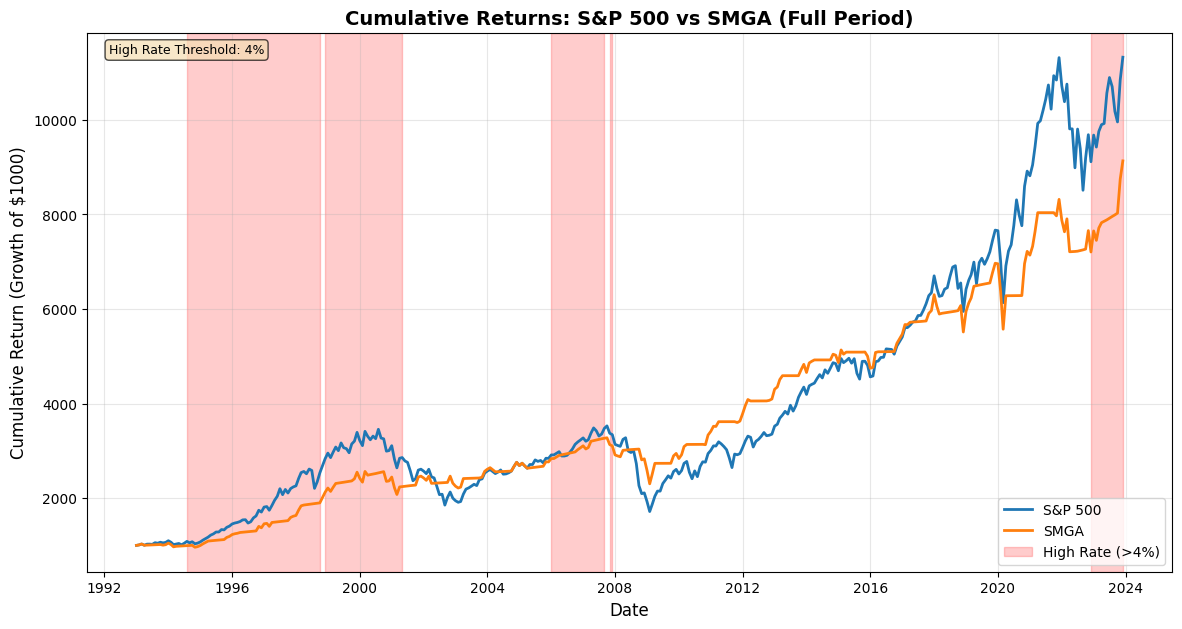

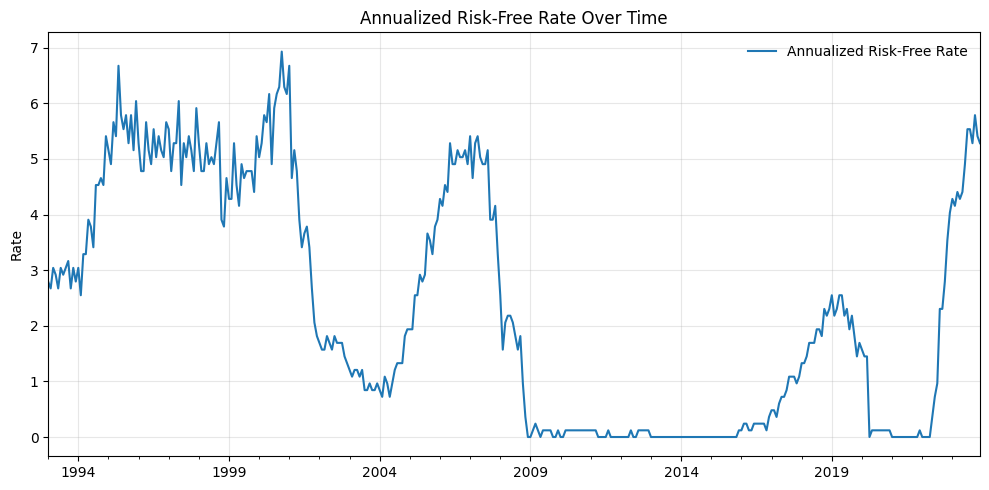

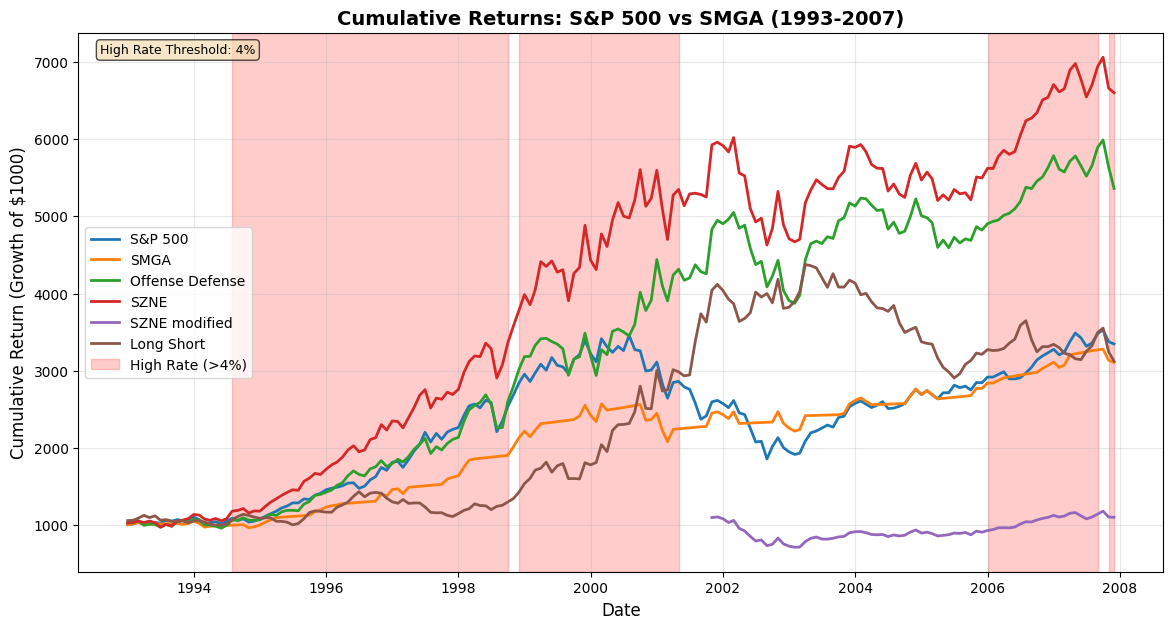

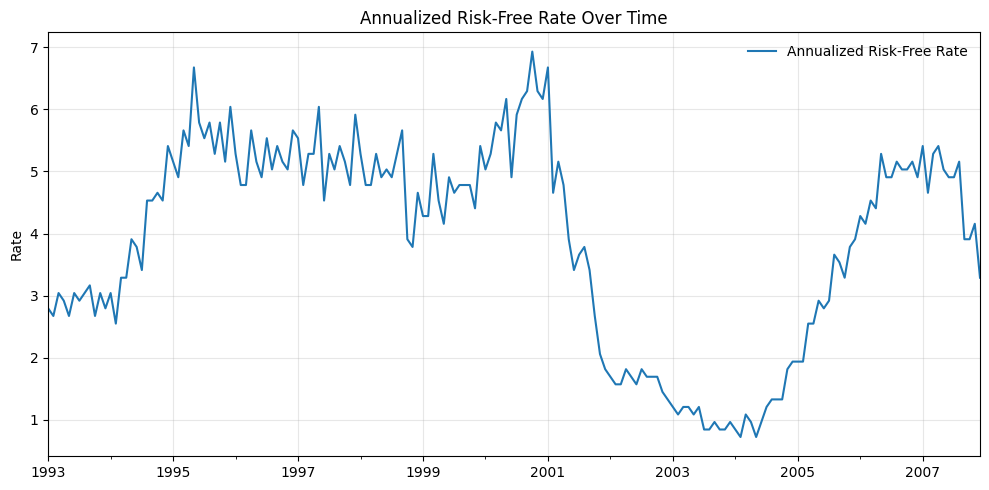

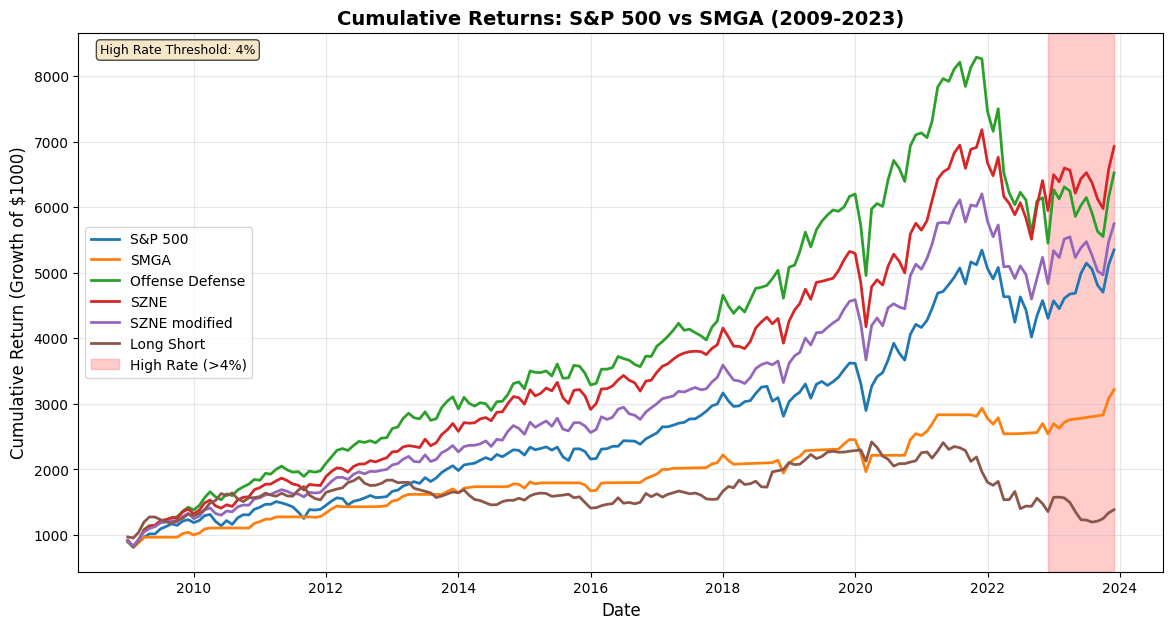

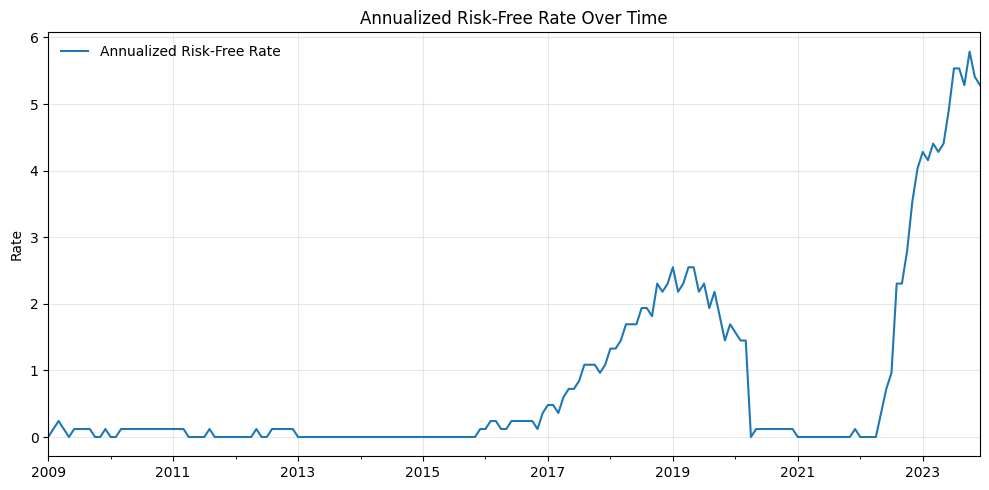

In [21]:

strategies_full = {
    'S&P 500': sp500_p["gross"],
    'SMGA': smga_p["gross"],
    #'Offense Defense': off_def_p['gross'],
    #'SZNE': pacer_p['gross'],
}

plot_cumulative_returns(strategies_full, title="Cumulative Returns: S&P 500 vs SMGA (Full Period)", rf_data=sp500_p['rf'])

# %%
# Cell 13: Plot cumulative returns - Period 1 (1993-2007)
strategies_p1 = {
    'S&P 500': sp500_p1["gross"],
    'SMGA': smga_p1["gross"],
    'Offense Defense': off_def_p1['gross'],
    'SZNE': pacer_p1['gross'],
    'SZNE modified': mod_pacer_p1['gross'],
    'Long Short': ls_p1['gross'],
}

plot_cumulative_returns(strategies_p1, title="Cumulative Returns: S&P 500 vs SMGA (1993-2007)", rf_data=sp500_p1['rf'])

# %%
# Cell 14: Plot cumulative returns - Period 2 (2009-2023)
strategies_p2 = {
    'S&P 500': sp500_p2["gross"],
    'SMGA': smga_p2["gross"],
    'Offense Defense': off_def_p2['gross'],
    'SZNE': pacer_p2['gross'],
    'SZNE modified': mod_pacer_p2['gross'],
    'Long Short': ls_p2['gross']
}

plot_cumulative_returns(strategies_p2, title="Cumulative Returns: S&P 500 vs SMGA (2009-2023)", rf_data=sp500_p2['rf'])

## Cumulative returns side by side comparison with Pacer ETF

Period 2 filtered: 94 observations
Date range: 2018-01-01 00:00:00 to 2025-10-01 00:00:00
PERIOD 3: 2018-2025 STATISTICS
                       Mean (%)  Median (%)  Std Dev (%)  Sharpe  Sortino   N  \
Strategy                                                                        
S&P 500                   1.113       2.031        4.800   0.659    1.019  94   
SMGA                      0.595       0.200        3.731   0.366    0.394  94   
Offense Defence           0.602       0.730        5.659   0.245    0.387  94   
Pacer SZNE                0.491       0.480        5.543   0.178    0.277  87   
Pacer SZNE replicated     0.758       0.724        4.783   0.403    0.663  94   
Pacer SZNE modified       0.838       1.273        4.760   0.464    0.678  94   

                         Start      End  
Strategy                                 
S&P 500                2018-01  2025-10  
SMGA                   2018-01  2025-10  
Offense Defence        2018-01  2025-10  
Pacer SZNE          

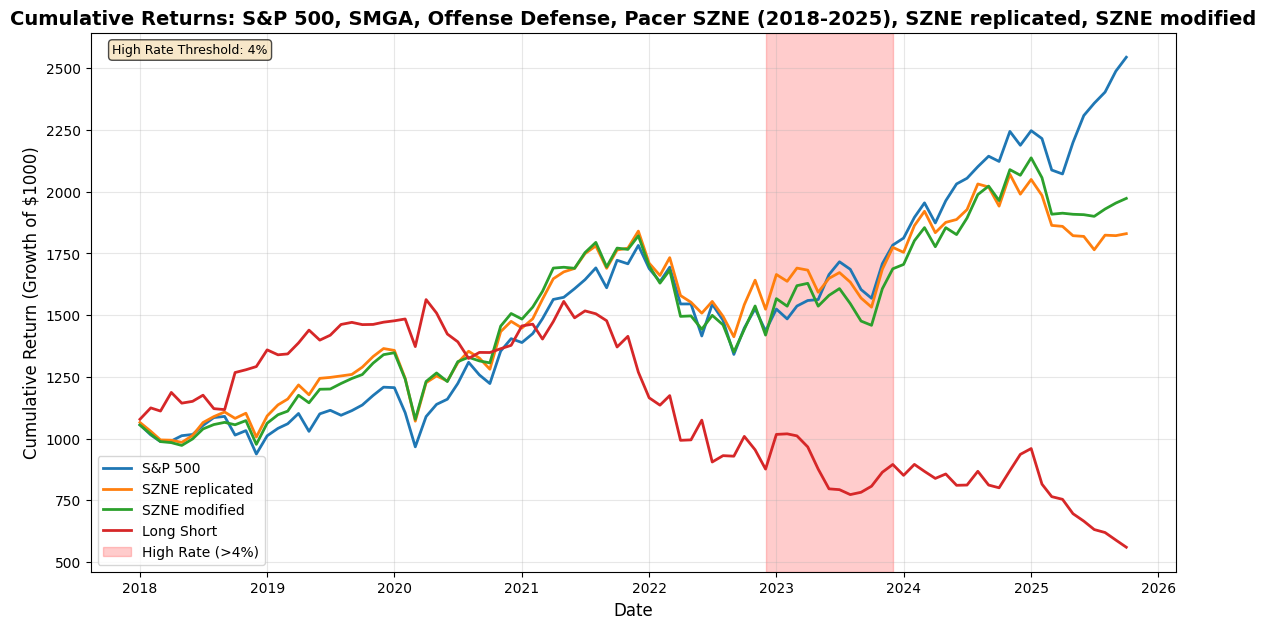

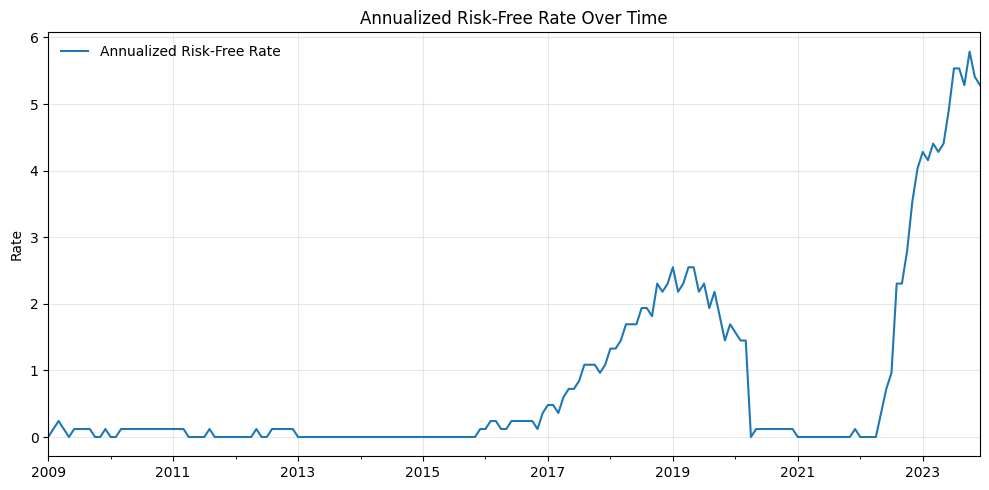

In [22]:
sp500_p3 = filter_period(sp500_returns, start_year=2018, end_year=2025)
smga_p3 = filter_period(smga_returns, start_year=2018, end_year=2025)
off_def_p3 = filter_period(rotation_returns, start_year=2018, end_year=2025)
pacer_p3 = filter_period(pacer_returns, start_year=2018, end_year=2025)
pacer_repl_p3 = filter_period(pacer_returns_repl, start_year=2018, end_year=2025)
pacer_mod_p3 = filter_period(modified_pacer, start_year=2018, end_year=2025)
ls_p3 = filter_period(ls, start_year=2018, end_year=2025)


print(f"Period 2 filtered: {len(sp500_p3)} observations")
print(f"Date range: {sp500_p3.index.min()} to {sp500_p3.index.max()}")

# %%
# Cell 10: Calculate statistics for Period 2 (2009-2023)
stats_sp500_p3 = calculate_statistics_ts(sp500_p3, 'S&P 500')
stats_smga_p3 = calculate_statistics_ts(smga_p3, 'SMGA')
stats_offdef_p3 = calculate_statistics_ts(off_def_p3, 'Offense Defence')
stats_pacer_p3 = calculate_statistics_ts(pacer_p3, 'Pacer SZNE')
stats_pacer_repl_p3 = calculate_statistics_ts(pacer_repl_p3, 'Pacer SZNE replicated')
stats_pacer_modified_p3 = calculate_statistics_ts(pacer_mod_p3, 'Pacer SZNE modified')
stats_ls_p3 = calculate_statistics_ts(ls_p3, 'Long Short')


summary_p3 = pd.DataFrame([stats_sp500_p3, stats_smga_p3, stats_offdef_p3, stats_pacer_p3, stats_pacer_repl_p3, stats_pacer_modified_p3]).set_index('Strategy')
print("="*80)
print("PERIOD 3: 2018-2025 STATISTICS")
print("="*80)
print(summary_p3)

# plotting cumulative return graphs for 2018 - 2025
strategies_p3 = {
    'S&P 500': sp500_p3["gross"],
    #'SMGA': smga_p3["gross"],
    #'Offense Defense': off_def_p3['gross'],
    #'SZNE': pacer_p3['gross'],
    'SZNE replicated': pacer_repl_p3['gross'],
    'SZNE modified': pacer_mod_p3['gross'],
    'Long Short': ls_p3['gross'],
}

plot_cumulative_returns(strategies_p3, title="Cumulative Returns: S&P 500, SMGA, Offense Defense, Pacer SZNE (2018-2025), SZNE replicated, SZNE modified", rf_data=sp500_p2['rf'])


## More plots

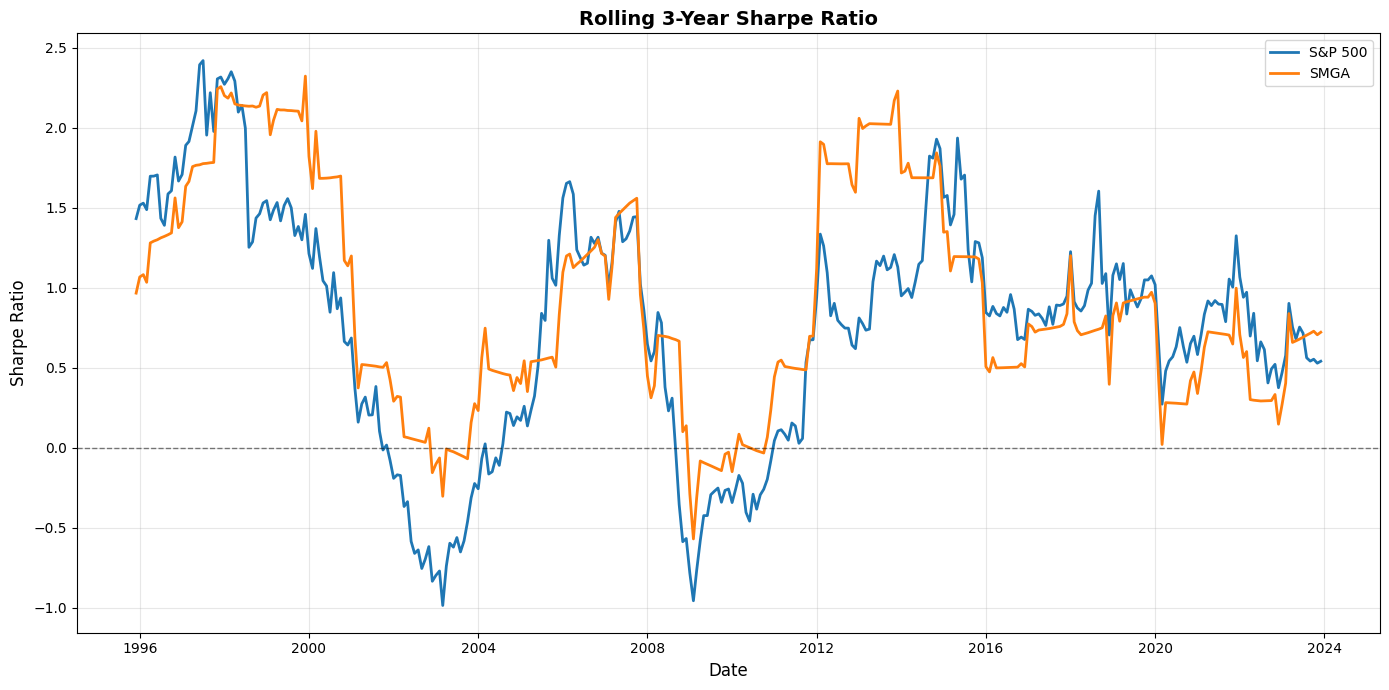

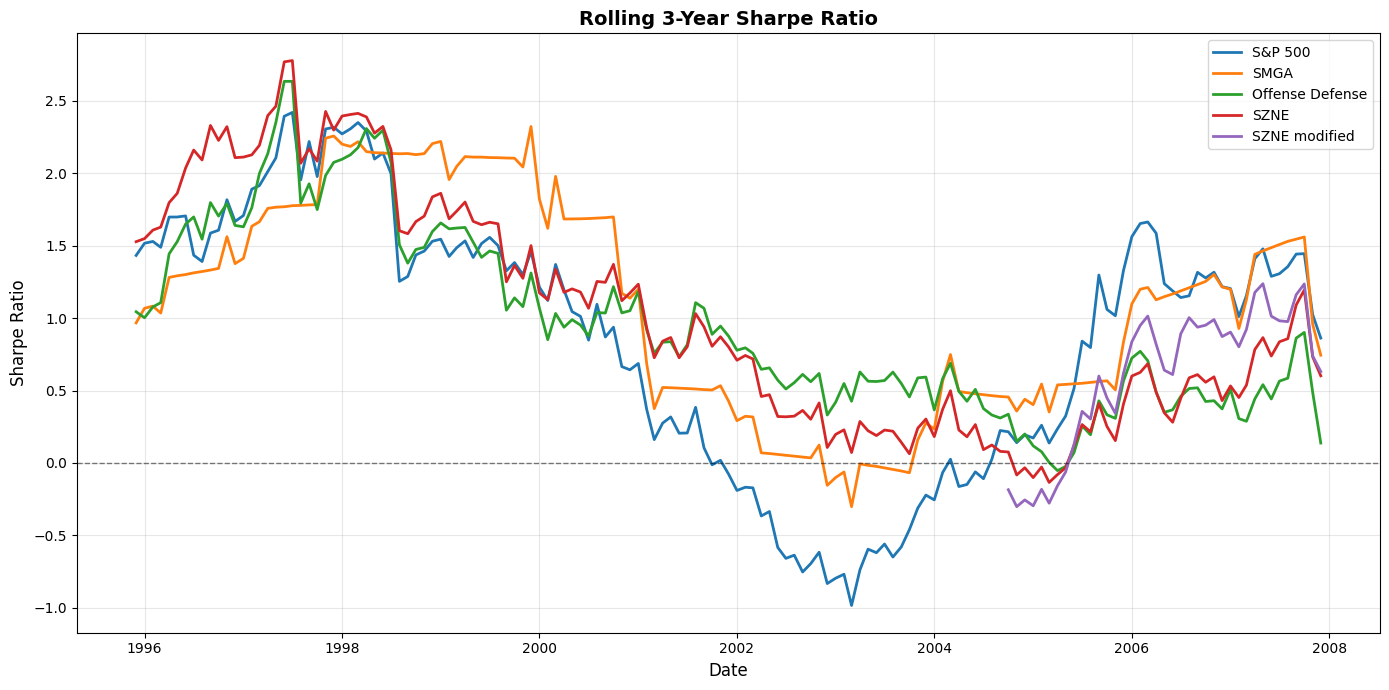

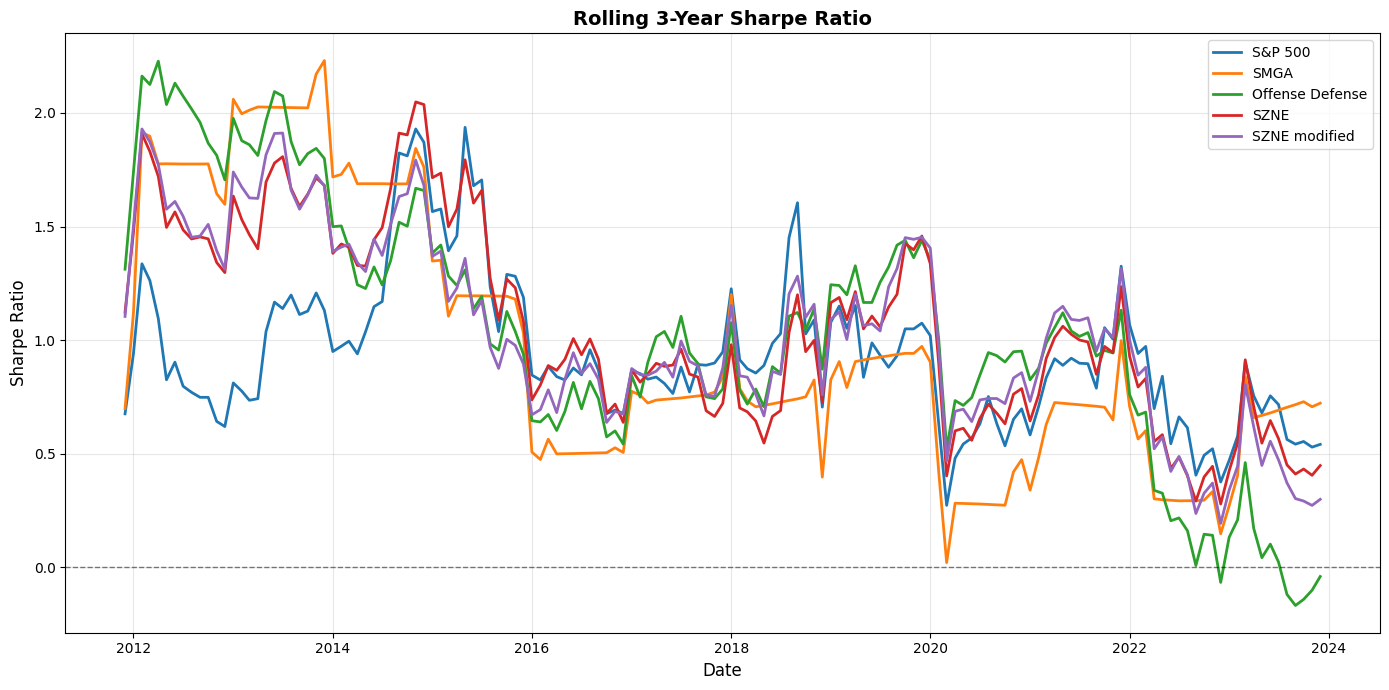

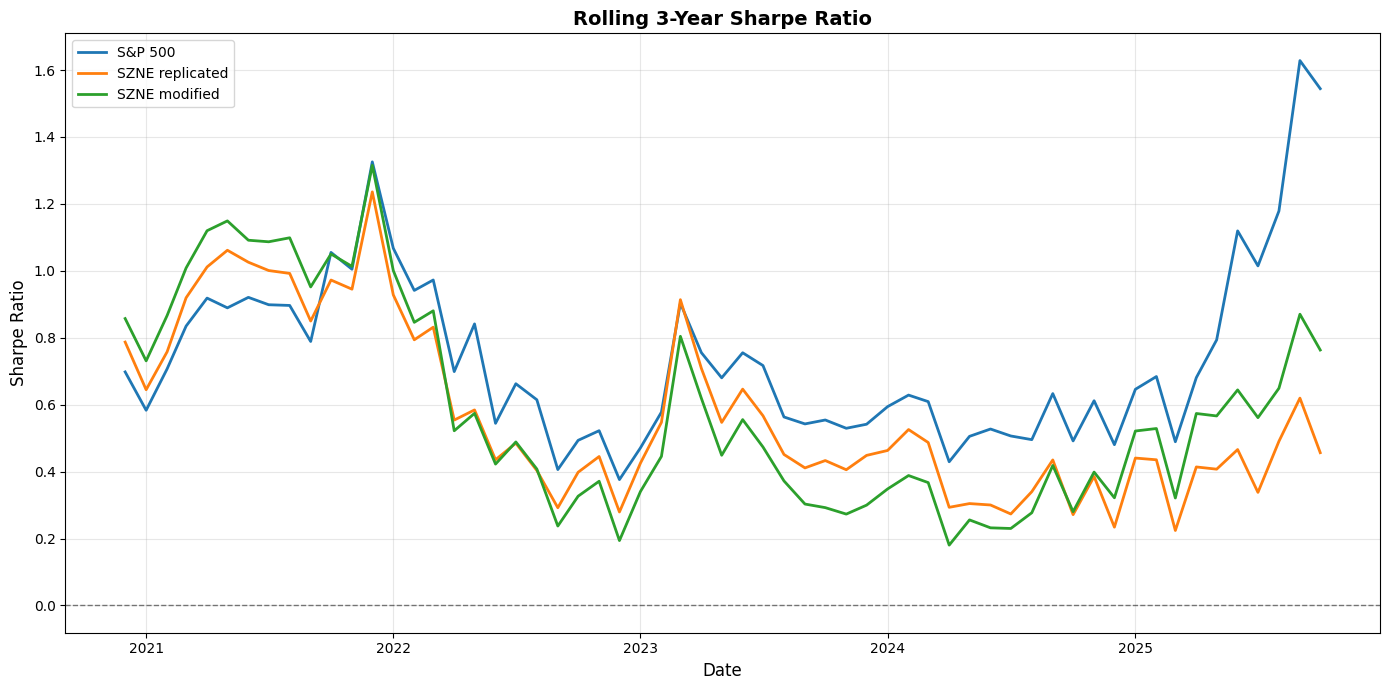

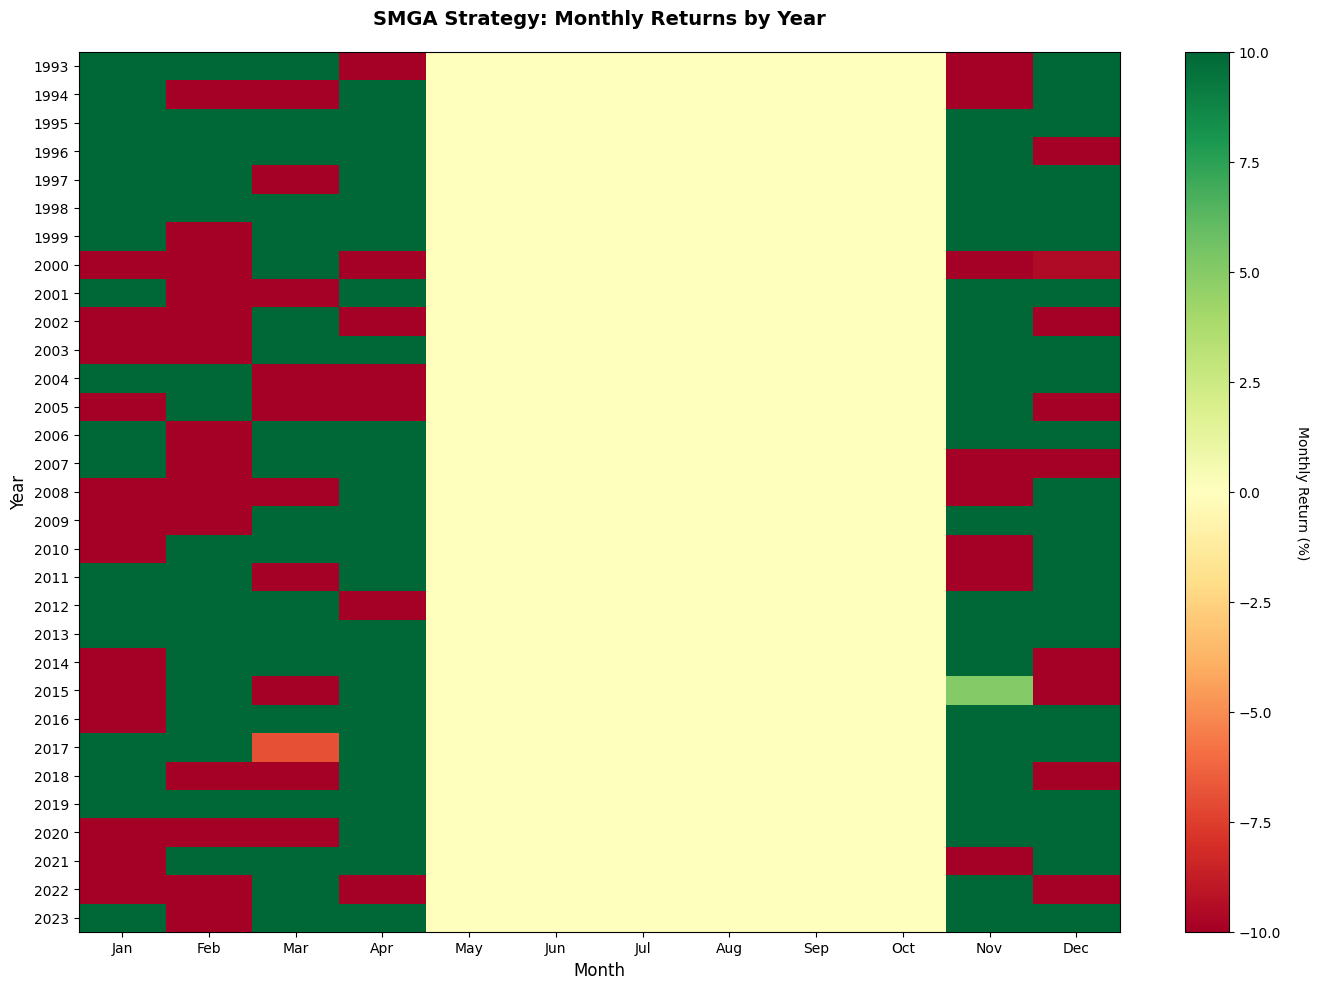

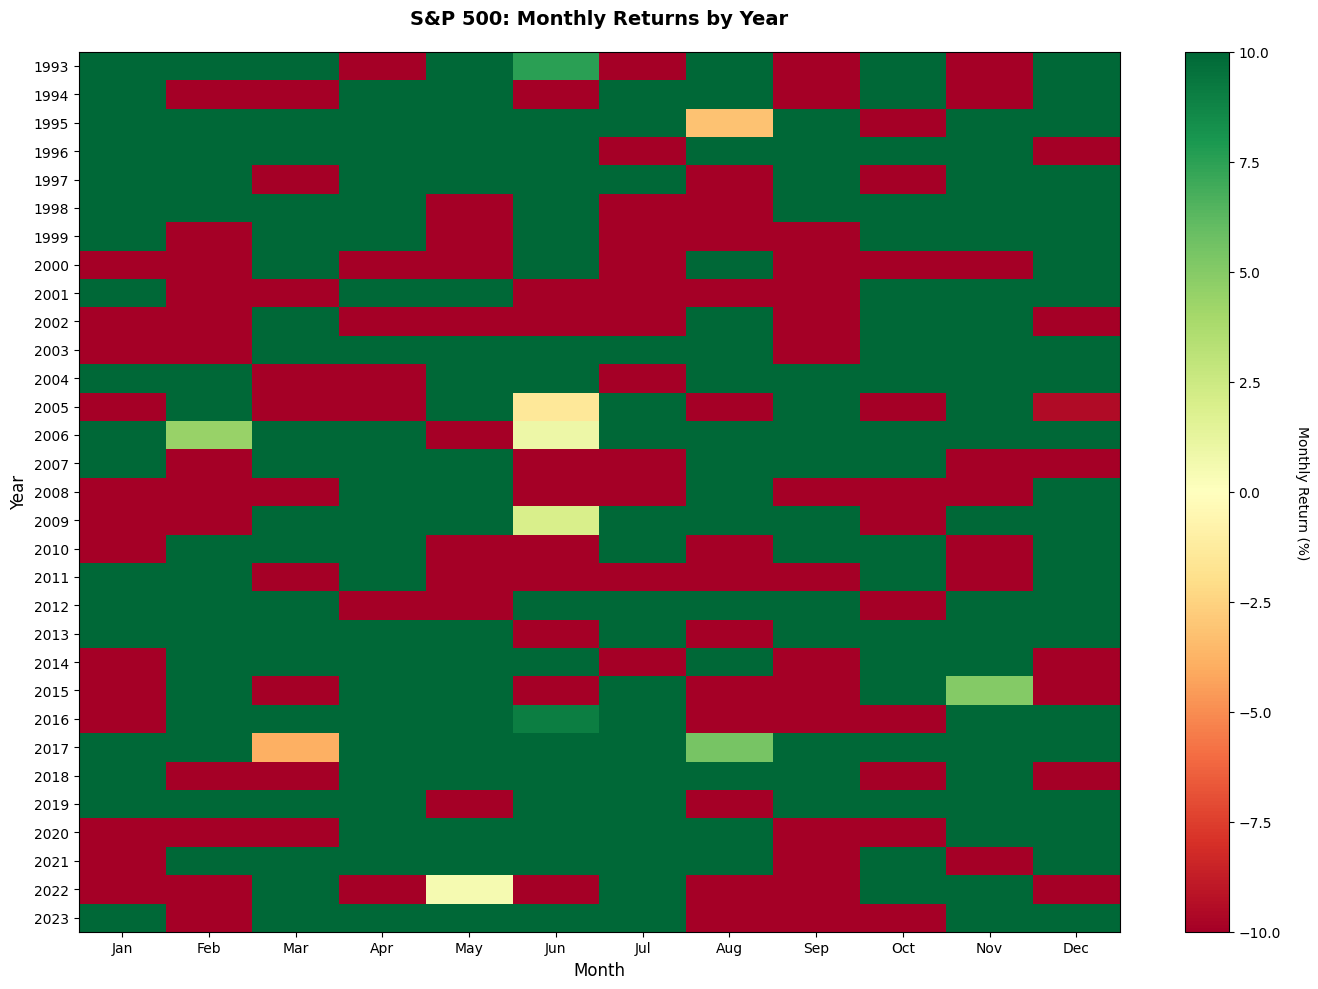

In [14]:
# Cell 15: Rolling 3-year Sharpe Ratio
plot_rolling_sharpe(strategies_full, window=36, title="Rolling 3-Year Sharpe Ratio")

# Cell 15: Rolling 3-year Sharpe Ratio
plot_rolling_sharpe(strategies_p1, window=36, title="Rolling 3-Year Sharpe Ratio")

# Cell 15: Rolling 3-year Sharpe Ratio
plot_rolling_sharpe(strategies_p2, window=36, title="Rolling 3-Year Sharpe Ratio")

# Cell 15: Rolling 3-year Sharpe Ratio
plot_rolling_sharpe(strategies_p3, window=36, title="Rolling 3-Year Sharpe Ratio")

# %%
# Cell 16: Monthly returns heatmap - SMGA strategy
plot_monthly_returns_heatmap(smga_p["excess"], title="SMGA Strategy: Monthly Returns by Year")

# %%
# Cell 17: Monthly returns heatmap - S&P 500 baseline
sp500_returns
plot_monthly_returns_heatmap(sp500_p["gross"], title="S&P 500: Monthly Returns by Year")

## Seasonal pattern anslysis

In [15]:
# Create month column for grouping
smga_by_month = smga_p['gross'].to_frame('return')
smga_by_month['month'] = smga_by_month.index.month

sp500_by_month = sp500_p['gross'].to_frame('return')
sp500_by_month['month'] = sp500_by_month.index.month

# Calculate average by month
smga_monthly_avg = smga_by_month.groupby('month')['return'].mean()
sp500_monthly_avg = sp500_by_month.groupby('month')['return'].mean()

seasonal_comparison = pd.DataFrame({
    'S&P 500': sp500_monthly_avg,
    'SMGA': smga_monthly_avg
})
seasonal_comparison.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print("Average Monthly Returns (%) by Month:")
print(seasonal_comparison)

Average Monthly Returns (%) by Month:
    S&P 500   SMGA
Jan   0.470  0.470
Feb  -0.211 -0.211
Mar   1.149  1.149
Apr   1.893  1.893
May   0.554  0.192
Jun   0.124  0.184
Jul   1.336  0.191
Aug  -0.384  0.202
Sep  -0.815  0.199
Oct   1.634  0.193
Nov   2.186  2.186
Dec   1.048  1.048


## Seasonal comparison plot

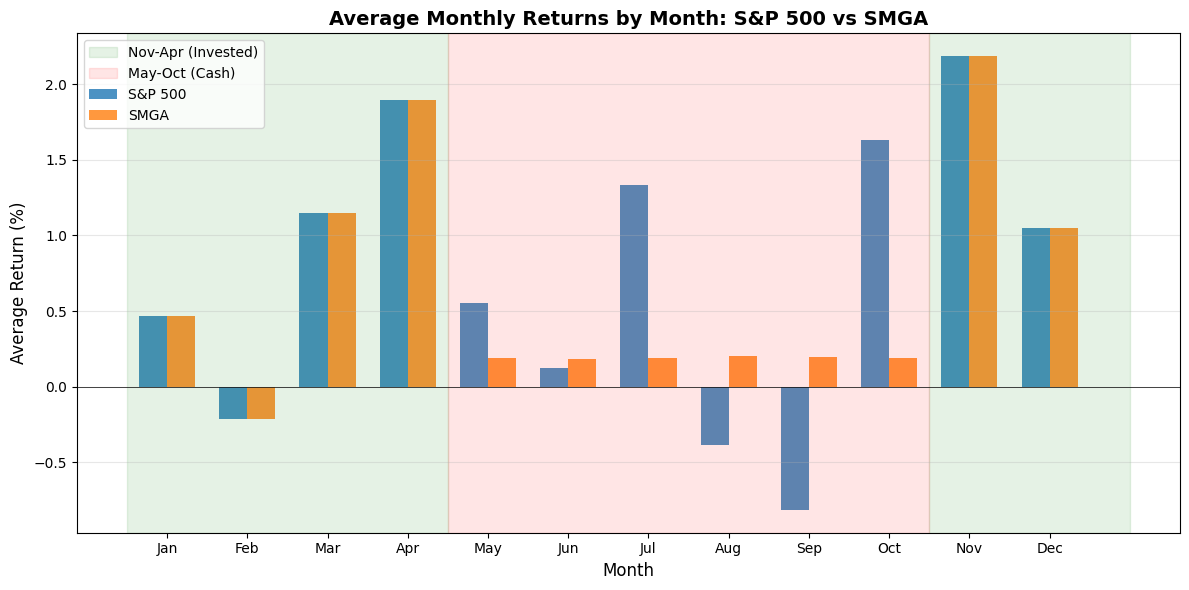

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(seasonal_comparison.index))
width = 0.35

ax.bar(x - width/2, seasonal_comparison['S&P 500'], width, label='S&P 500', alpha=0.8)
ax.bar(x + width/2, seasonal_comparison['SMGA'], width, label='SMGA', alpha=0.8)

# Highlight Nov-Apr period
ax.axvspan(9.5, 12, alpha=0.1, color='green', label='Nov-Apr (Invested)')
ax.axvspan(-0.5, 3.5, alpha=0.1, color='green')
ax.axvspan(3.5, 9.5, alpha=0.1, color='red', label='May-Oct (Cash)')

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Return (%)', fontsize=12)
ax.set_title('Average Monthly Returns by Month: S&P 500 vs SMGA', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(seasonal_comparison.index)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()